# Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

1. Read the column description and ensure you understand each attribute well
2. Study the data distribution in each attribute, share your findings. (5 points)
3. Get the target column distribution. Your comments
4. Split the data into training and test set in the ratio of 70:30 respectively
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
6. Print the confusion matrix for all the above models (5 points)
7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

In [43]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [44]:
bank_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [45]:
bank_df.shape

(5000, 14)

In [46]:
bank_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [47]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# EDA on Data
Data Findings : 
    1. ID Column is just number, this can be dropped
    2. Experience cannot be -3 , we can replace it with zero
    3. ZIP Code is ordinal, may help to target the region
    4. Mortigage is skewed only above 75% has the values
    5. Personal Loan,Security Account,CD Account,Credit Card are  skewed only above 75% the values of 1 are there
    6. Online only above 50% are using Internet banking
    

    

In [50]:
#Dropping column ID
new_bank_df=bank_df.drop(['ID'],axis=1)
new_bank_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [51]:
#Replace Minimum experience to 0 for the values which are less then zero
new_bank_df.loc[new_bank_df.Experience < 0, 'Experience'] = 0

In [52]:
new_bank_df['Experience'].describe()

count    5000.000000
mean       20.119600
std        11.440484
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [53]:
# Minimum is zero , no negative values for experience


In [54]:
# Change the zipcode to categorical variable
new_bank_df['ZIP Code'] = new_bank_df['ZIP Code'].astype('category')
new_bank_df['Experience'] = new_bank_df['Experience'].astype('category')
new_bank_df['Family'] = new_bank_df['Family'].astype('category')
new_bank_df['Education'] = new_bank_df['Education'].astype('category')
new_bank_df['Securities Account'] = new_bank_df['Securities Account'].astype('category')
new_bank_df['CD Account'] = new_bank_df['CD Account'].astype('category')
new_bank_df['Online'] = new_bank_df['Online'].astype('category')
new_bank_df['CreditCard'] = new_bank_df['CreditCard'].astype('category')

In [55]:
new_bank_df.dtypes

Age                      int64
Experience            category
Income                   int64
ZIP Code              category
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan            int64
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [56]:
new_bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1c901520208>,
 'caps': [<matplotlib.lines.Line2D at 0x1c90276dc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c901520400>],
 'medians': [<matplotlib.lines.Line2D at 0x1c9027764e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c902776908>],
 'means': []}

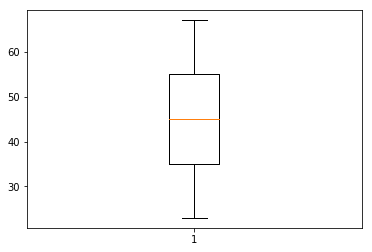

In [57]:
plt.boxplot(new_bank_df["Age"],0,'o')

In [58]:
#AGE is between the Inter Quartile Ranges


{'whiskers': [<matplotlib.lines.Line2D at 0x1c902727ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c90273ef98>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c90273e550>],
 'medians': [<matplotlib.lines.Line2D at 0x1c902748b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c902748f98>],
 'means': []}

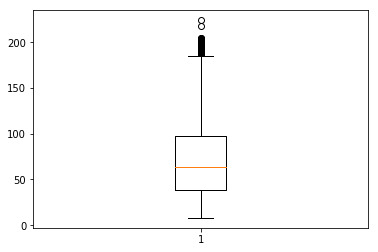

In [59]:
plt.boxplot(new_bank_df["Income"],0,'o')

In [60]:
#This data is skewed and there are outliers which are above Average Income

{'whiskers': [<matplotlib.lines.Line2D at 0x1c902788d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1c9027d6dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c9027d6048>],
 'medians': [<matplotlib.lines.Line2D at 0x1c9027df668>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c9027dfa90>],
 'means': []}

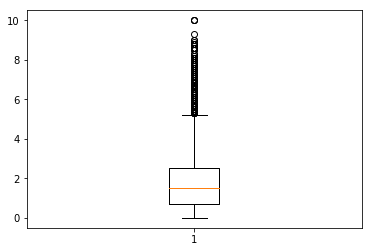

In [61]:
plt.boxplot(new_bank_df["CCAvg"],0,'o')

In [62]:
#Credit Card Average spending is also skewed and lot of outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1c902826cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c902832978>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c902826ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c902832e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c902839630>],
 'means': []}

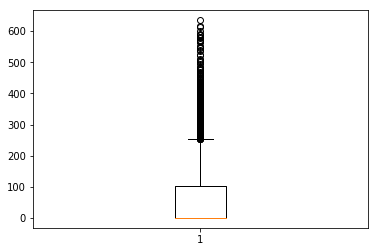

In [63]:
plt.boxplot(new_bank_df["Mortgage"],0,'o')

In [64]:
#Mortigage data is out of Interquartile range also skewed and lot of outliers

In [65]:
from sklearn import preprocessing
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
#scaled_df = scaler.fit_transform(new_bank_df)
#scaled_df = pd.DataFrame(scaled_df, columns=['Mortgage','CCAvg','Income'])

#new_bank_df[['Mortgage','CCAvg','Income']] = scaler.fit_transform(new_bank_df[['Mortgage','CCAvg','Income']])

C:\Users\kotav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kotav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kotav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\kotav\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


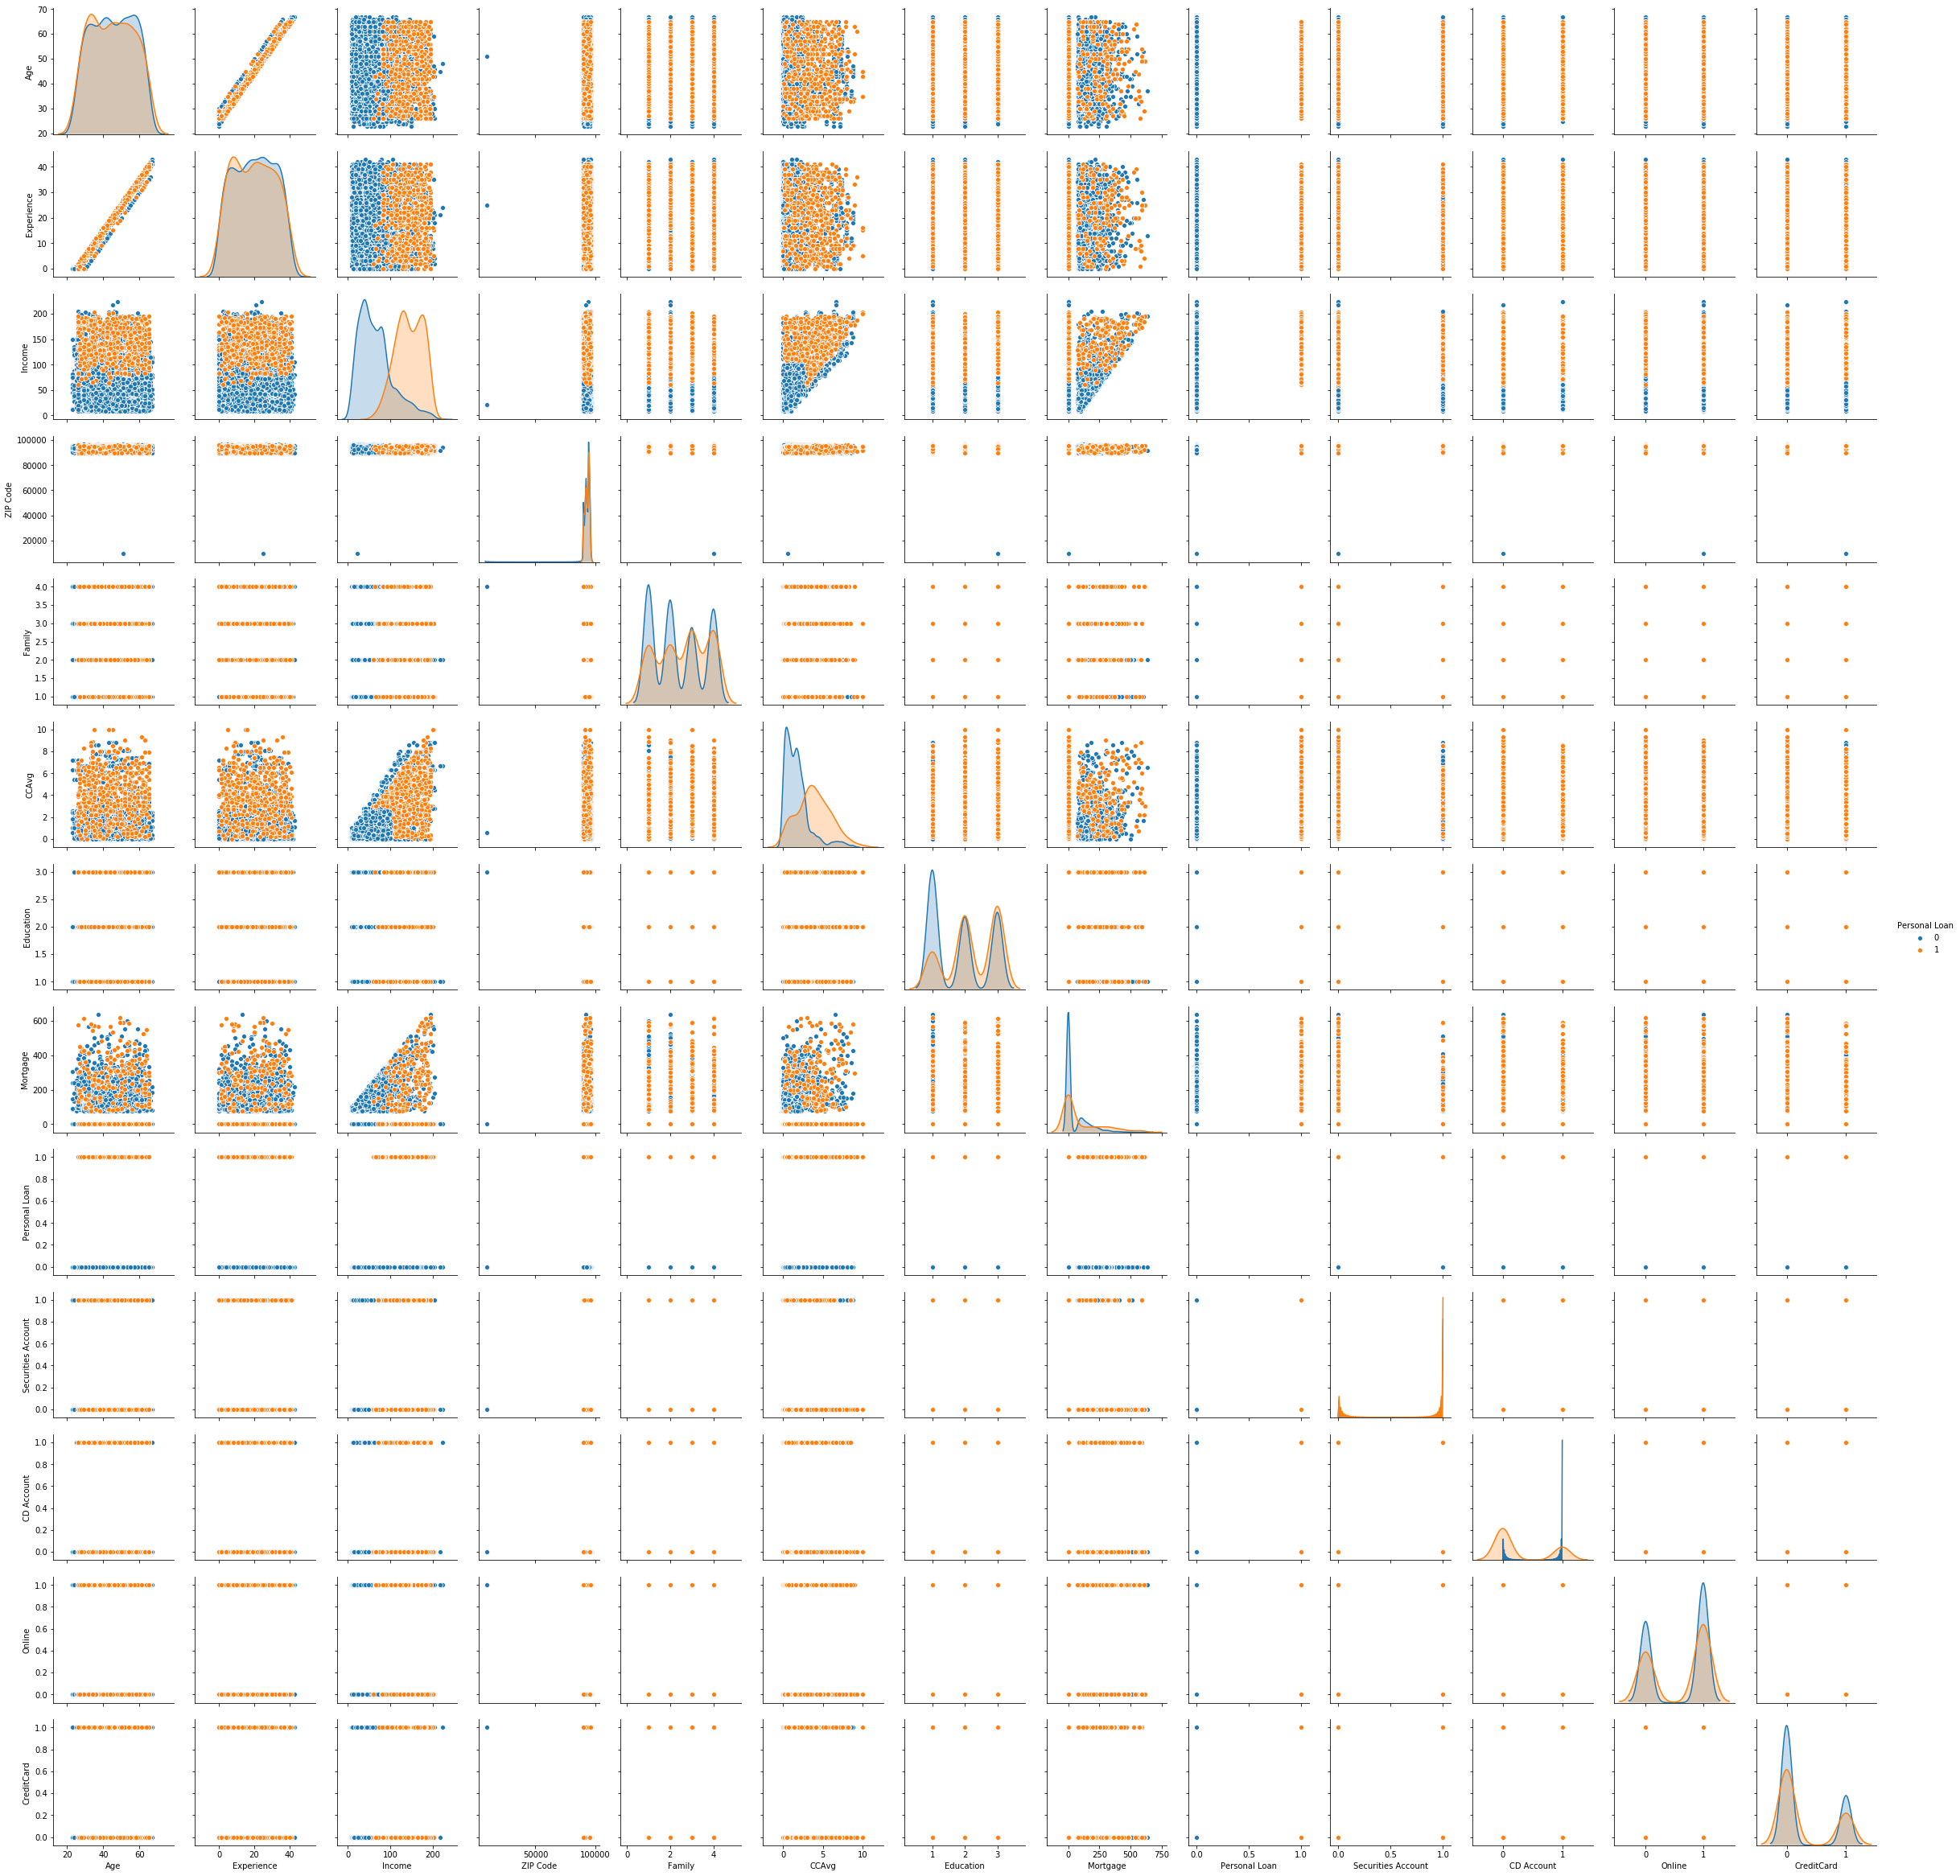

In [110]:
import seaborn as sns
%matplotlib inline
sns.pairplot(new_bank_df.iloc[:,:], hue = "Personal Loan", diag_kind="auto")


# Findings on Distribution
1. AGE - Age has 3 Guasian curves, this means there are 3 categories in the age.
      This is completely overlapping with Personal Loans, does not give much informaion
2. Experience is also similar to AGE feature properties
3. INCOME - Clearly seperates the the target customer taking the personal loans
4. ZIPCODES is skekewed- Means there are some specific set of zipcodes where the personal loans are taken more
5. FAMILY - There are 4 categories and all of them are similar distribution. Also as the size of the family increases chance of taking Personal loan also increases
6. CC Average - This feature of average spending on Credit Card also to some extent seperates
7. EDUCATION - This has 3 groups. As the education level increases chance of taking personal loan also increases
8. MORTIGAGE - Most of the customer who have Mortigage also have personal loans
9. Securities Account - Does not give much information
10. CD Account - All of the Customer who do not have CD Account has the personal loan, but vice versa is not true
11. Online Internet banking and Credit Card - hare overlapping

In [67]:
### SPLITTING INTO TRAINING AND TEST SETS
X=new_bank_df.drop(['Personal Loan'],axis=1)
y=new_bank_df['Personal Loan']
X.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [68]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [69]:
### SPLITTING INTO TRAINING AND TEST SETS
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [70]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [102]:
y_predict =logreg.predict(X_test)
score = logreg.score(X_test, y_test)
print("Score : {}".format(score))

Score : 0.9073333333333333


In [100]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

metrics.confusion_matrix(y_test, y_predict)

array([[1317,   34],
       [ 105,   44]], dtype=int64)

In [103]:
print("Precision : {}".format(precision_score(y_test, y_pred, average="macro")))
print("Recall  : {}".format(recall_score(y_test, y_pred, average="macro")) )   
print("F1 Score : {}".format(f1_score(y_test, y_pred, average="macro")))

Precision : 0.6930017863895372
Recall  : 0.5735299231491463
F1 Score : 0.5966001174813693


# KNN Model Evaluaion

In [74]:
from sklearn.neighbors import KNeighborsClassifier
## Creating the K Nearest Neighbour Classifier Object
## weights options are 'uniform' 'distance'
## weights = 'distance' - weighs points by inverse of their distance
NNH = KNeighborsClassifier(n_neighbors = 3)


In [75]:
## Fit the model
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [76]:
from sklearn import metrics
y_pred = NNH.predict(X_test)
print("Score : {}".format(metrics.accuracy_score(y_test, y_pred)))

0.9026666666666666


In [104]:
print("Precision : {}".format(precision_score(y_test, y_pred, average="macro")))
print("Recall  : {}".format(recall_score(y_test, y_pred, average="macro")) )   
print("F1 Score : {}".format(f1_score(y_test, y_pred, average="macro")))

Precision : 0.6930017863895372
Recall  : 0.5735299231491463
F1 Score : 0.5966001174813693


# Model Evaluation with different neighbours 5,9,11

In [106]:
NNH = KNeighborsClassifier(n_neighbors = 5)
## Fit the model
NNH.fit(X_train, y_train)
y_pred = NNH.predict(X_test)
print("Score : {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precision : {}".format(precision_score(y_test, y_pred, average="macro")))
print("Recall  : {}".format(recall_score(y_test, y_pred, average="macro"))  )  
print("F1 Score : {}".format(f1_score(y_test, y_pred, average="macro")))

Score : 0.8933333333333333
Precision : 0.6682162063622277
Recall  : 0.5825115872408706
F1 Score : 0.6042712324972463


In [98]:
NNH = KNeighborsClassifier(n_neighbors = 7)
## Fit the model
NNH.fit(X_train, y_train)
y_pred = NNH.predict(X_test)
print("Score : {}".format(metrics.accuracy_score(y_test, y_pred))
print("Precision : {}".format(precision_score(y_test, y_pred, average="macro")))
print("Recall  : {}".format(recall_score(y_test, y_pred, average="macro")) )   
print("F1 Score : {}".format(f1_score(y_test, y_pred, average="macro")))

0.8986666666666666
0.6930017863895372
0.5735299231491463
0.5966001174813693


In [107]:
NNH = KNeighborsClassifier(n_neighbors = 9)
## Fit the model
NNH.fit(X_train, y_train)
y_pred = NNH.predict(X_test)
print("Score : {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precision : {}".format(precision_score(y_test, y_pred, average="macro")))
print("Recall  : {}".format(recall_score(y_test, y_pred, average="macro"))    )
print("F1 Score : {}".format(f1_score(y_test, y_pred, average="macro")))

Score : 0.9026666666666666
Precision : 0.7254251566366556
Recall  : 0.563808066607385
F1 Score : 0.5857419569625617


In [108]:
NNH = KNeighborsClassifier(n_neighbors = 11)
## Fit the model
NNH.fit(X_train, y_train)
y_pred = NNH.predict(X_test)
print("Score : {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precision : {}".format(precision_score(y_test, y_pred, average="macro")))
print("Recall  : {}".format(recall_score(y_test, y_pred, average="macro"))   ) 
print("F1 Score : {}".format(f1_score(y_test, y_pred, average="macro")))

Score : 0.8993333333333333
Precision : 0.6887346730245232
Recall  : 0.5440439346444841
F1 Score : 0.5560903811743124


# KNN Model is better prediction with 9 Nighbors

# Naïve Bayes Model Evaluaion


In [86]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
GNB = clf.fit(X_train, y_train)

In [112]:
## Get the predications
y_pred=GNB.predict(X_test)
print("Score : {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precision : {}".format(precision_score(y_test, y_pred, average="macro")))
print("Recall  : {}".format(recall_score(y_test, y_pred, average="macro")))    
print("F1 Score : {}".format(f1_score(y_test, y_pred, average="macro")))

Score : 0.884
Precision : 0.6934276451517831
Recall  : 0.7445243145768234
F1 Score : 0.7143369991594284


In [89]:
new_bank_df.dtypes

Age                      int64
Experience            category
Income                   int64
ZIP Code              category
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan            int64
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [90]:
new_bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1c902876ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c9028a9f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c9028a9198>],
 'medians': [<matplotlib.lines.Line2D at 0x1c9028b37b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c9028b3be0>],
 'means': []}

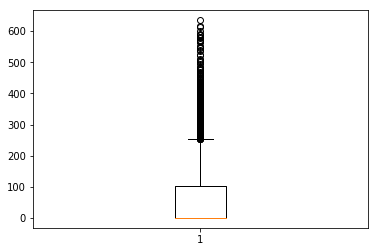

In [91]:
plt.boxplot(new_bank_df["Mortgage"],0,'o')

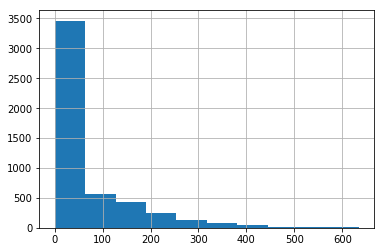

In [92]:
new_bank_df["Mortgage"].hist()

# MODEL Performance Evaluation

Logistic Regression
    Score     : 0.9073333333333333
    Precision : 0.6934276451517831
    Recall    : 0.7445243145768234
    F1 Score  : 0.7143369991594284

K Near Neighbours(Highest between 3,5,7,9,11, best one was 9)
    Score     : 0.9026666666666666
    Precision : 0.7254251566366556
    Recall    : 0.563808066607385
    F1 Score  : 0.5857419569625617

Naïve Bayes
    Score     : 0.884
    Precision : 0.6934276451517831
    Recall    : 0.7445243145768234
    F1 Score  : 0.7143369991594284

# Logistic Regression with 0.90 is best model betweenLogistic,KNN and Naive Bayers for this data set